In [1]:
#--------------VISCOUS FLUID---------- SPHERICAL PARTICLE--------VARIABLE TIME---------
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
fig = plt.figure() 

In [2]:
x_arr = np.loadtxt('age 23.txt')                                      #all elements are in micron
y_arr = np.loadtxt('age 24.txt')                                       #all elements are in micron
t_arr = np.loadtxt('age 25.txt') 

In [3]:
len(x_arr) 

99999

In [4]:
'''import pandas as pd
df = pd.DataFrame(t_arr)'''

'import pandas as pd\ndf = pd.DataFrame(t_arr)'

In [5]:
'''df'''

'df'

In [6]:
'''pd.DataFrame.describe(df)'''

'pd.DataFrame.describe(df)'

In [7]:
'''pd.DataFrame.hist(df,bins=50)'''

'pd.DataFrame.hist(df,bins=50)'

In [4]:
# -------------------------Mean square displacent function and Time lag----------------------- 
import statistics as stat
from numba import jit
# ---------mean square displacement function---------- 
@jit
def msd_1d(x):
    result = np.zeros_like(x)
    for delta in range(1,len(x)):
        thisresult = 0
        for i in range(delta,len(x)):
            thisresult += (x[i] - x[i-delta])**2
        result[delta] = thisresult / (len(x) - delta)
    return result
    

In [5]:
msd_x_arr = msd_1d(x_arr)

In [6]:
len(msd_x_arr)

99999

In [12]:
t_step = np.arange(0,10**4, 0.1) # creating intervals 

In [13]:
len(t_step)

100000

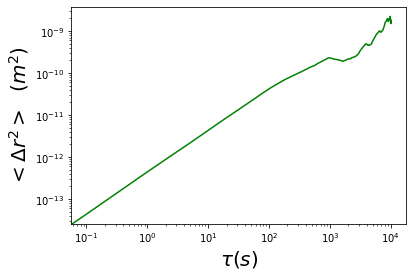

In [14]:
plt.plot(t_step[:-1],msd_x_arr,'g-')

plt.ylabel(r'$<\Delta r^2> \ \  (m^2)$',size=20)
plt.xlabel(r'$\tau  (s)$',size=20)

plt.xscale('log')
plt.yscale('log')
#plt.savefig('viscous_long.png')
#plt.axis('square')


plt.show()

In [14]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(np.log10(t_step), np.log10(msd_x_arr))

/Users/manishkumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/manishkumar/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [15]:
slope

nan

In [11]:
'''plt.plot(mean_t_arr,msd_xarr,'bo-')
plt.plot(mean_t_arr,msd_yarr,'ro-')
plt.ylabel(r'$<\Delta x^2>,<\Delta y^2> \ \  (m^2)$',size=15)
plt.xlabel(r'$\tau  (s)$',size=20)

plt.xscale('log')
plt.yscale('log')
#plt.savefig('viscous_x_y_long.png')

plt.show()

'''

"plt.plot(mean_t_arr,msd_xarr,'bo-')\nplt.plot(mean_t_arr,msd_yarr,'ro-')\nplt.ylabel(r'$<\\Delta x^2>,<\\Delta y^2> \\ \\  (m^2)$',size=15)\nplt.xlabel(r'$\tau  (s)$',size=20)\n\nplt.xscale('log')\nplt.yscale('log')\n#plt.savefig('viscous_x_y_long.png')\n\nplt.show()\n\n"

In [12]:
'''np.savetxt('msd_x_viscous.txt',msd_xarr)
np.savetxt('msd_y_viscous.txt',msd_yarr)
np.savetxt('msd_r_viscous.txt',msd_rarr)
np.savetxt('t_arr_viscous.txt',mean_t_arr)
np.savetxt('counterarray_viscous.txt',counterarray)'''

"np.savetxt('msd_x_viscous.txt',msd_xarr)\nnp.savetxt('msd_y_viscous.txt',msd_yarr)\nnp.savetxt('msd_r_viscous.txt',msd_rarr)\nnp.savetxt('t_arr_viscous.txt',mean_t_arr)\nnp.savetxt('counterarray_viscous.txt',counterarray)"

In [13]:
'''import numpy
a = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])
index = ['time', 'msd_r', 'msd_x', 'msd_y']

import pandas as pd
df_a = pd.DataFrame(a, index)
df_a_tp = pd.DataFrame.transpose(df_a)

numpy.savetxt("viscous_long.csv", df_a_tp, delimiter=",")'''

'import numpy\na = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])\nindex = [\'time\', \'msd_r\', \'msd_x\', \'msd_y\']\n\nimport pandas as pd\ndf_a = pd.DataFrame(a, index)\ndf_a_tp = pd.DataFrame.transpose(df_a)\n\nnumpy.savetxt("viscous_long.csv", df_a_tp, delimiter=",")'